<a href="https://colab.research.google.com/github/yasuhiroinoue/AppMathSci/blob/main/%E5%BF%9C%E7%94%A8%E6%95%B0%E7%90%86(Adv_01).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
!pip install qiskit qiskit-aer matplotlib
!pip install qiskit_ibm_runtime
!pip install pylatexenc

In [67]:
# Built-in modules
import math

# Imports from Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import GroverOperator, MCMT, ZGate
from qiskit.visualization import plot_distribution, plot_histogram, array_to_latex  # 状態ベクトルをきれいに表示
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Imports from Qiskit Runtime
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler, Estimator, Session

# For plotting
import matplotlib.pyplot as plt

Run the code using a simulator as follows.

In [68]:
#状態ベクトルで表示できるようにシミュレーション
#量子回路をわたして、戻り値は状態ベクトル
def Statevector_Simulator(qc):
  # AerSimulatorのインスタンスを作成
  sim = AerSimulator(method='statevector')

  # 回路をトランスパイル
  compiled_qc = transpile(qc, sim)

  # シミュレーションを実行
  res = sim.run(compiled_qc).result()
  # 状態ベクトルを取得
  state = res.get_statevector(compiled_qc)

  return state

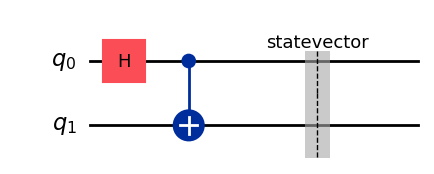

In [69]:
# Create a 2-qubit circuit
circuit = QuantumCircuit(2)
circuit.h(0)  # Apply Hadamard gate
circuit.cx(0, 1)  # Apply CNOT gate
circuit.save_statevector()
circuit.draw('mpl')

In [70]:
state = Statevector_Simulator(circuit)
# 状態ベクトルを表示
array_to_latex(state, prefix="state = ")

<IPython.core.display.Latex object>

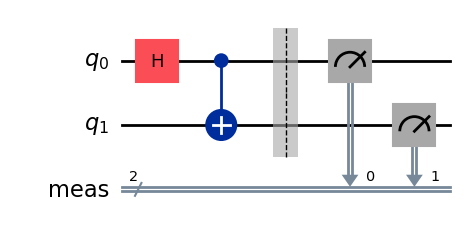

In [72]:
from qiskit_aer import Aer
backend = Aer.get_backend('qasm_simulator') #qasm_simulator: 回路を複数回実行し、測定結果の統計を取得するためのシミュレータ

# Create a 2-qubit circuit
circuit = QuantumCircuit(2)
circuit.h(0)  # Apply Hadamard gate
circuit.cx(0, 1)  # Apply CNOT gate
circuit.measure_all()

circuit.draw('mpl')

In [73]:
# Transpile the ideal circuit to a circuit that can be directly executed by the backend
transpiled_circuit = transpile(circuit, backend)
# transpiled_circuit.draw('mpl')

In [74]:
# Execute using the Sampler primitive
sampler = Sampler(mode=backend)
job = sampler.run([transpiled_circuit], shots=1024)

In [75]:
pub_result = job.result()[0]
print(f"Counts for the meas output register: {pub_result.data.meas.get_counts()}")

Counts for the meas output register: {'00': 526, '11': 498}


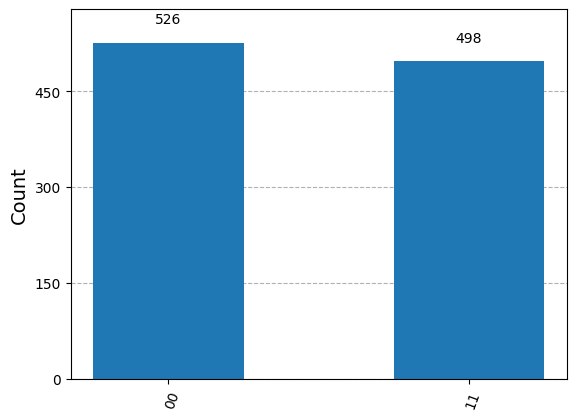

In [76]:
# Display the histogram
plot_histogram(pub_result.data.meas.get_counts())

Run the code on Quantum Computer at IBM as follows.

In [77]:
from google.colab import userdata
ibm_token = userdata.get('ibm_token')

In [78]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main',
    token=ibm_token
)

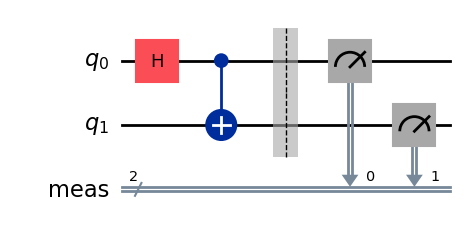

In [79]:
# Create a 2-qubit circuit
circuit = QuantumCircuit(2)
circuit.h(0)  # Apply Hadamard gate
circuit.cx(0, 1)  # Apply CNOT gate
circuit.measure_all()
circuit.draw('mpl')

In [80]:
# Select the least busy available backend
backend = service.least_busy(operational=True, simulator=False)
print(f"Selected backend: {backend}")

# Transpile the circuit with optimization level 1
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(circuit)

# Execute using the Sampler primitive
sampler = Sampler(mode=backend)
sampler.options.default_shots = 1024  # Options can be set using auto-complete.
job = sampler.run([isa_circuit])
print(f"Job ID is {job.job_id()}")

Selected backend: <IBMBackend('ibm_brisbane')>
Job ID is cy5tkfn9b62g008hkjb0


In [81]:
job = service.job('cw0mjxkjz3x0008j6fqg')

In [82]:
pub_result = job.result()[0]
print(f"Counts for the meas output register: {pub_result.data.meas.get_counts()}")

Counts for the meas output register: {'11': 507, '00': 487, '10': 7, '01': 23}


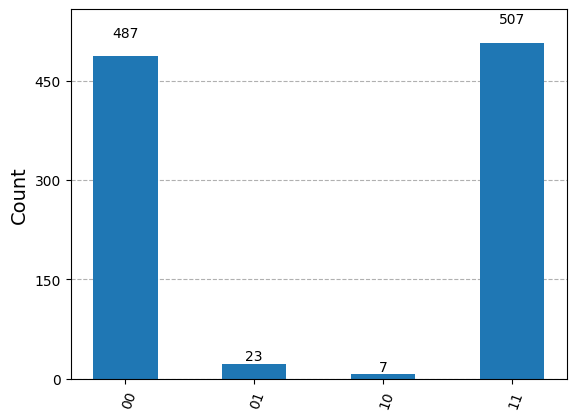

In [83]:
# Display the histogram
plot_histogram(pub_result.data.meas.get_counts())